In [ ]:
# output -> RECORDS_<NUM>_1
!python3 valid_signals.py

In [ ]:
# output -> RECORDS_<NUM>_2
!python3 valid_length.py

In [ ]:
# output -> RECORDS_<NUM>_3
!python3 valid_signals_length.py

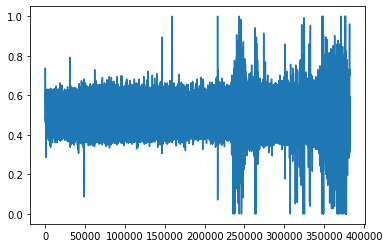

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import runcmd
from wfdb import rdrecord
from os.path import exists

base_dir = 'physionet.org/files/mimic3wdb/1.0/'
path = base_dir + '30/3000063/3000063_0007'

if not exists(path + '.hea'):
    runcmd('wget -r -np https://' + path + '.hea')

if not exists(path + '.dat'):
    runcmd('wget -r -np https://' + path + '.dat')

rec = rdrecord(path)
signals = rec.sig_name
pleth = rec.p_signal[:, signals.index('PLETH')].astype(np.float64)
abp = rec.p_signal[:, signals.index('ABP')].astype(np.float64)

pleth[np.argwhere(np.isnan(pleth))] = 0
abp[np.argwhere(np.isnan(pleth))] = 0

plt.plot(pleth)
plt.show()

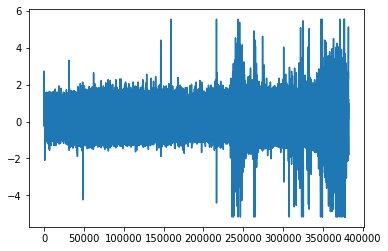

In [4]:
from sklearn.preprocessing import StandardScaler

# Remove mean and scale to unit variance.
scaler = StandardScaler()
pleth = scaler.fit_transform(pleth.reshape(-1, 1)).reshape(-1)

plt.plot(pleth)
plt.show()

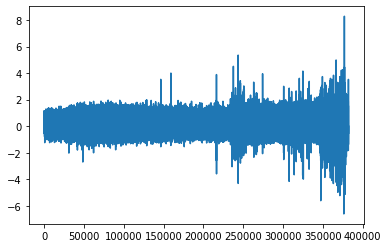

In [5]:
from scipy.signal import butter, sosfiltfilt

sos = butter(4, [0.5, 8.0], btype='bandpass', output='sos', fs=125)
pleth = sosfiltfilt(sos, pleth, padtype=None)

plt.plot(pleth)
plt.show()

In [6]:
import pandas as pd
from utils import hampel

pleth = np.array(hampel(pd.Series(pleth), window_size=100, n=5, imputation=True))

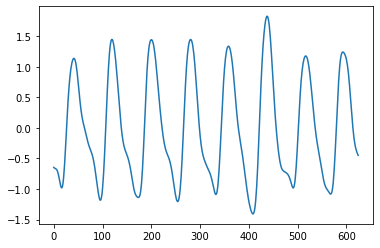

In [7]:
plt.plot(pleth[50000:50625])
plt.show()

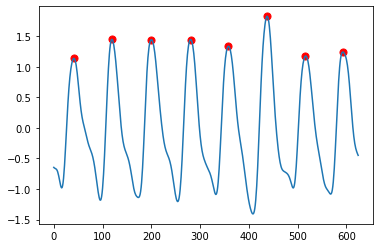

In [18]:
from neurokit2.ppg import ppg_findpeaks

x = ppg_findpeaks(pleth[50000:50625], sampling_rate=125)['PPG_Peaks']

plt.plot(pleth[50000:50625])
plt.scatter(x, pleth[50000:50625][x], s=50, c='red', marker='o')
plt.show()

In [9]:
results

{'PPG_Peaks': array([   235,    396,    537, ..., 381871, 381980, 382074])}